In [1]:
from Define_System import system
from Define_Slater_Circuit import slater_circ
from Define_Measurment_Circuits import create_circs
from Define_Quantum_Device import Quantum_Device
from Define_Analyzers import analyze_energy, post_select
from Define_Lancozos import Lancozos
from Define_Hold_Function import create_hold_circs

In [21]:
systemQ = system('triangle',4) 
Fd = systemQ.Fld()
paulis = systemQ.pauli_strings()
circs = create_circs(Fd,paulis)
circs_hold = create_hold_circs(1.3,circs)

QD = Quantum_Device(backend = 'ibm_auckland', layout = [0,1,2,3])

results = QD.get_results(circs ,method = "matrix")
results = QD.chop_results(results)


save_id_file = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/Job_id_main_post_select_hold"
results = QD.get_results(circs_hold, method = 'quantum', save_id_file = save_id_file)

 
 
 
 
 
 
 
 
 
 
 
 
 
62d6e50a48ebb3743f5ed3d0


# Save and Load

In [28]:
#import pickle
#fpath = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/"

#file_to_store = open(fpath + "main_triangle_4_auckland_hold.pickle", "wb")

#pickle.dump(results, file_to_store)

In [28]:
#import pickle
#fpath = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/"

#file_to_read = open(fpath + "main_square_8_auckland.pickle", "rb")

#loaded_results = pickle.load(file_to_read)

In [30]:
#results = post_select(loaded_results)
#results = QD.normalize_results(results)


# Plots

In [24]:
import numpy as np

paulis = systemQ.pauli_strings()
F = systemQ.Fl()
#psi_spin = systemQ.psi_spin([1,2])
psi_spin = systemQ.psi_spin([2,3])
#psi_spin = systemQ.psi_spin([3,4])
#psi_spin = systemQ.psi_spin([6,7])

#parameters
u = 1
k = 1
d = 0

#Exact Eigenvalue
H = systemQ.H(k,u,d)
e0 = Lancozos(H,20)[0]
#e,y = np.linalg.eig(H)
#y = np.transpose(y)
#arg = np.argsort(e)

#Scan
eg = []
gl = []
eT = []
for gi in range(-10,10):
    g = gi
    egl = analyze_energy(g,u,k,d,paulis,results)
    eg.append(egl)
    gl.append(g)
    eT.append(e0)
    #eT.append(e[arg[[0]]])

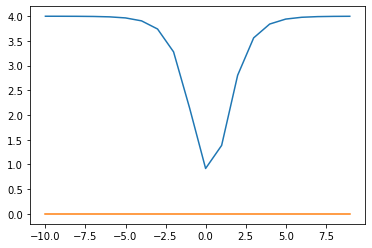

In [25]:
import matplotlib.pyplot as plt

plt.plot(gl,eg)
plt.plot(gl,eT)

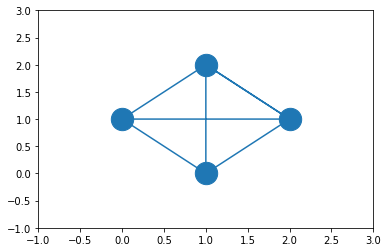

In [26]:
systemQ.draw()

# Tests

In [25]:
from Define_Slater_Circuit import givens, phase_offset
import numpy as np
from qiskit import quantum_info as qi


qc = slater_circ(Fd)
psi_tst = qi.Statevector.from_instruction(qc).data
#psi1 = systemQ.psi1([1,2])
psi1 = systemQ.psi1([2,3])
#psi1 = systemQ.psi1([3,4])
phase = phase_offset(Fd)
np.amax(np.abs( psi_tst - phase*psi1 ))

3.0531133177191805e-16

In [26]:

results = QD.normalize_results(results)

In [27]:
from Define_Paulis import bkt,Mdot
from Define_Analyzers import analyze_GG, analyze_GMG, analyze_GDG, analyze_GKG
g = 1.1
m = 2.1
k = 1.6
d = 0.7
G = systemQ.G(g)
D = systemQ.D(d)
M = systemQ.M(m)
K = systemQ.K(k)
#psi_spin = systemQ.psi_spin([1,2])
psi_spin = systemQ.psi_spin([2,3])
#psi_spin = systemQ.psi_spin([3,4])
GG = bkt(psi_spin,Mdot([G,G]),psi_spin)
GDG = bkt(psi_spin,Mdot([G,D,G]),psi_spin)
GKG = bkt(psi_spin,Mdot([G,K,G]),psi_spin)
GMG = bkt(psi_spin,Mdot([G,M,G]),psi_spin)
E = (GMG + GKG + GDG)/GG 
print(GG - analyze_GG(g,results[0]))
print(GDG - analyze_GDG(g,d,results[0]))
print(GMG - analyze_GMG(g,m,results[0]))
print(GKG - analyze_GKG(g,k,paulis,results))
print(E - analyze_energy(g,m,k,d,paulis,results))

(1.1102230246251565e-16+0j)
(-1.3877787807814457e-17+0j)
(1.3322676295501878e-15+0j)
(-1.1102230246251565e-16+0j)
(6.217248937900877e-15+0j)


In [37]:
from Define_Paulis import X,Y
from Define_Analyzers import analyze_GPG

i=0; j=3

cdc = Mdot([X(i,8),X(j,8)]) + Mdot([Y(i,8),Y(j,8)])
GPG = bkt(psi_spin,Mdot([G,cdc,G]),psi_spin)
print(GPG - analyze_GPG(g,paulis[5],paulis,results))

(0.16003198696146148+0j)


In [35]:
paulis

['ZZZZ',
 'XXII',
 'YYII',
 'XZXI',
 'YZYI',
 'XZZX',
 'YZZY',
 'IXXI',
 'IYYI',
 'IXZX',
 'IYZY',
 'IIXX',
 'IIYY']